In [3]:
import numpy as np
import pandas as pd
import pandas_datareader.data as pdr
# https://wendys.tistory.com/174

import matplotlib.pyplot as plt

import datetime

import torch
import torch.nn as nn
from torch.autograd import Variable 

import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

# dataset : 우리가 원하는 데이터 셋 (init : 변수 선언 , 데이터 load / get item 샘플 뽑기)
# dataloader : batch size 관련 
# https://sanghyu.tistory.com/90

In [2]:
pip install pandas_datareader

Note: you may need to restart the kernel to use updated packages.


<AxesSubplot:xlabel='Date'>

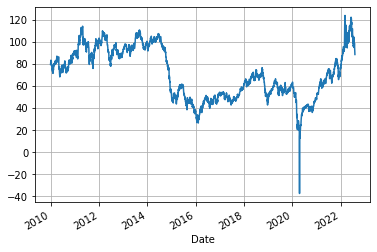

In [5]:
start = (2010,1,1)
start = datetime.datetime(*start)
end = datetime.date.today()  

df = pdr.DataReader('CL=F', 'yahoo', start, end)
df.head(5)
df.tail(5)
df.Close.plot(grid=True)

In [6]:
df.head(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2009-12-31,80.000000,79.160004,79.279999,79.360001,120372.0,79.360001
2010-01-04,81.680000,79.629997,79.629997,81.510002,263542.0,81.510002
2010-01-05,82.000000,80.949997,81.629997,81.769997,258887.0,81.769997
2010-01-06,83.519997,80.849998,81.430000,83.180000,370059.0,83.180000
2010-01-07,83.360001,82.260002,83.199997,82.660004,246632.0,82.660004


In [7]:
df.tail(5)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-08-01,98.650002,92.419998,98.459999,93.889999,365293.0,93.889999
2022-08-02,96.470001,92.589996,93.750000,94.419998,328538.0,94.419998
2022-08-03,96.570000,90.379997,93.830002,90.660004,395099.0,90.660004
2022-08-04,91.900002,87.550003,90.949997,88.540001,395099.0,88.540001
2022-08-05,89.419998,87.790001,88.059998,88.320000,58517.0,88.320000


In [8]:
X = df.drop(columns='Volume')
y = df.iloc[:,5:6]

print(X)
print(y)

                 High        Low       Open      Close  Adj Close
Date                                                             
2009-12-31  80.000000  79.160004  79.279999  79.360001  79.360001
2010-01-04  81.680000  79.629997  79.629997  81.510002  81.510002
2010-01-05  82.000000  80.949997  81.629997  81.769997  81.769997
2010-01-06  83.519997  80.849998  81.430000  83.180000  83.180000
2010-01-07  83.360001  82.260002  83.199997  82.660004  82.660004
...               ...        ...        ...        ...        ...
2022-08-01  98.650002  92.419998  98.459999  93.889999  93.889999
2022-08-02  96.470001  92.589996  93.750000  94.419998  94.419998
2022-08-03  96.570000  90.379997  93.830002  90.660004  90.660004
2022-08-04  91.900002  87.550003  90.949997  88.540001  88.540001
2022-08-05  89.419998  87.790001  88.059998  88.320000  88.320000

[3171 rows x 5 columns]
            Adj Close
Date                 
2009-12-31  79.360001
2010-01-04  81.510002
2010-01-05  81.769997
2010-01

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
mm = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
y_mm = mm.fit_transform(y)

X_train = X_ss[:2500,:]
X_test = X_ss[2500:,:]

y_train = y_mm[:2500,:]
y_test = y_mm[2500:,:]

print("Training Shape", X_train.shape, y_train.shape)
print("Testing Shape", X_test.shape, y_test.shape) 

Training Shape (2500, 5) (2500, 1)
Testing Shape (671, 5) (671, 1)


In [11]:
X_train_tensors = Variable(torch.Tensor(X_train))
X_test_tensors = Variable(torch.Tensor(X_test))

y_train_tensors = Variable(torch.Tensor(y_train))
y_test_tensors = Variable(torch.Tensor(y_test))

X_train_tensors_final = torch.reshape(X_train_tensors,   (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_final = torch.reshape(X_test_tensors,  (X_test_tensors.shape[0], 1, X_test_tensors.shape[1])) 

print("Training Shape", X_train_tensors_final.shape, y_train_tensors.shape)
print("Testing Shape", X_test_tensors_final.shape, y_test_tensors.shape) 

# https://subinium.github.io/pytorch-Tensor-Variable/

Training Shape torch.Size([2500, 1, 5]) torch.Size([2500, 1])
Testing Shape torch.Size([671, 1, 5]) torch.Size([671, 1])


In [14]:
class LSTM0(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM0, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length 
        
        self.lstm = nn.LSTM(input_size = input_size, hidden_size = hidden_size, num_layers = num_layers, batch_first=True)
        self.fc_1 = nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)
        
        self.relu = nn.ReLU()
        
    def forward(self, x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        output, (hn, cn) = self.lstm(x, (h_0, c_0)) 
        
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
    
    
       
        return out 

In [17]:
num_epochs = 30000
learning_rate = 0.001
input_size = 5
hidden_size = 2
num_layers = 1

num_classes = 1 

In [18]:
lstm0 =LSTM0(num_classes, input_size, hidden_size, num_layers, X_train_tensors_final.shape[1])
loss_function = torch.nn.MSELoss()
optimizer = torch.optim.Adam(lstm0.parameters(), lr= learning_rate)

In [20]:
for epoch in range(num_epochs):
    outputs = lstm0.forward(X_train_tensors_final)
    optimizer.zero_grad()
    
    loss = loss_function(outputs, y_train_tensors)
    loss.backward()
    
    optimizer.step()
    if epoch % 100 == 0:
        print("Epoch: %d, loss: %1.5f" % (epoch, loss.item())) 

Epoch: 0, loss: 0.64899
Epoch: 100, loss: 0.01163
Epoch: 200, loss: 0.00042
Epoch: 300, loss: 0.00023
Epoch: 400, loss: 0.00013
Epoch: 500, loss: 0.00008
Epoch: 600, loss: 0.00005
Epoch: 700, loss: 0.00003
Epoch: 800, loss: 0.00002
Epoch: 900, loss: 0.00002
Epoch: 1000, loss: 0.00002
Epoch: 1100, loss: 0.00001
Epoch: 1200, loss: 0.00001
Epoch: 1300, loss: 0.00001
Epoch: 1400, loss: 0.00001
Epoch: 1500, loss: 0.00001
Epoch: 1600, loss: 0.00001
Epoch: 1700, loss: 0.00001
Epoch: 1800, loss: 0.00001
Epoch: 1900, loss: 0.00001
Epoch: 2000, loss: 0.00001
Epoch: 2100, loss: 0.00001
Epoch: 2200, loss: 0.00001
Epoch: 2300, loss: 0.00001
Epoch: 2400, loss: 0.00001
Epoch: 2500, loss: 0.00001
Epoch: 2600, loss: 0.00001
Epoch: 2700, loss: 0.00001
Epoch: 2800, loss: 0.00001
Epoch: 2900, loss: 0.00000
Epoch: 3000, loss: 0.00000
Epoch: 3100, loss: 0.00000
Epoch: 3200, loss: 0.00000
Epoch: 3300, loss: 0.00000
Epoch: 3400, loss: 0.00000
Epoch: 3500, loss: 0.00000
Epoch: 3600, loss: 0.00000
Epoch: 3700, 

KeyboardInterrupt: 

In [22]:
df_X_ss = ss.transform(df.drop(columns='Volume'))
df_y_mm = mm.transform(df.iloc[:,5:6])

df_X_ss = Variable(torch.Tensor(df_X_ss))
df_y_mm = Variable(torch.Tensor(df_y_mm))
# 
df_X_ss = torch.reshape(df_X_ss, (df_X_ss.shape[0], 1,df_X_ss.shape[1]))

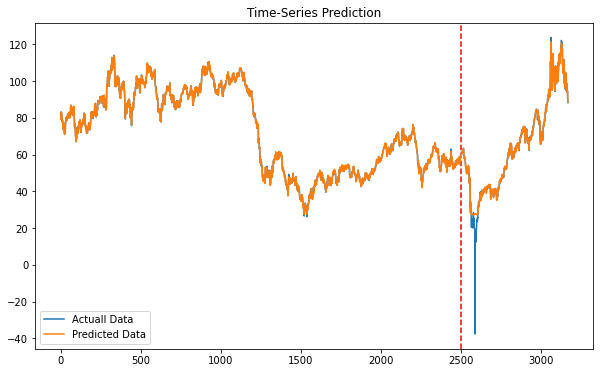

In [24]:
train_predict = lstm0(df_X_ss)
data_predict = train_predict.data.detach().numpy()
dataY_plot = df_y_mm.data.numpy()

data_predict = mm.inverse_transform(data_predict) #reverse transformation
dataY_plot = mm.inverse_transform(dataY_plot)
plt.figure(figsize=(10,6)) #plotting
plt.axvline(x=2500, c='r', linestyle='--') #size of the training set

plt.plot(dataY_plot, label='Actuall Data') #actual plot
plt.plot(data_predict, label='Predicted Data') #predicted plot
plt.title('Time-Series Prediction')
plt.legend()
plt.show() 